In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

hades = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36'}

In [ ]:
def scrape_detik(hal):
  global hades
  a = 1
  for page in range(1,hal):
    url = f'https://www.detik.com/search/searchall?query=keracunan+MBG&shortby=time&page={page}'
    ge = req.get(url,hades).text
    sop = bs(ge,'lxml')
    li = sop.find('div',class_='list-content')
    lin = li.find_all('article')
    for x in lin:
      link = x.find('a')['href']
      date = x.find('div', class_='media__date').find('span').text.strip()
      headline = x.find('h3', class_='media__title').find('a').text.strip()
      link = x.find('h3', class_='media__title').find('a')['href']
      #date = x.find('a').find('span',class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
      #headline = x.find('a').find('h3').text
      ge_ = req.get(link,hades).text
      sop_ = bs(ge_,'lxml')
      content = sop_.find_all('div',class_='detail__body-text itp_bodycontent')
      for x in content:
        x = x.find_all('p')
        y = [y.text for y in x]
        content_ = ''.join(y).replace('\n','').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
        print(f'done[{a}] > {headline[0:10]}')
        a += 1
        with open('mbg.csv','a') as file:
          wr = csv.writer(file, delimiter=',')
          wr.writerow([headline,date,link,content_])

In [ ]:
scrape_detik(300)

done[1] > BGN Kumpul
done[2] > Dinkes DKI
done[3] > Video: Ker
done[4] > Ratusan Si
done[5] > Video: Epi
done[6] > Puluhan Si
done[7] > Keracunan 
done[8] > Korban Ker
done[9] > Korban Ker
done[10] > Polisi Sel
done[11] > Keracunan 
done[12] > Siapa yang
done[13] > Kata Wabup
done[14] > Dinkes DKI
done[15] > Perawatan 
done[16] > Biaya Korb
done[17] > Fakta Baru
done[18] > Pemkab Aga
done[19] > BGN Perint
done[20] > Video: Mun
done[21] > 7 Siswa SD
done[22] > Usulan Aga
done[23] > Fakta-fakt
done[24] > Jabar Hari
done[25] > Video: Kor
done[26] > Pengakuan 
done[27] > Dinkes Kab
done[28] > Maaf Kepal
done[29] > Menteri Pi
done[30] > Korban Ker
done[31] > Keracunan 
done[32] > Video SPPG
done[33] > Skema Biay
done[34] > Murid SD d
done[35] > Luhut Tak 
done[36] > Langkah Bu
done[37] > Puluhan Si
done[38] > Biaya Pera
done[39] > Kepsek SMP
done[40] > Marak Kasu
done[41] > SMAN 3 Pur
done[42] > Kasus Sisw
done[43] > Video Data
done[44] > Puluhan Si
done[45] > Menkes Ung
done[46] > 100 Sisw

**DATA PROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DATA PREPROCESSING

import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/MBG/mbg_header.csv", on_bad_lines='warn')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4625 entries, 0 to 4624
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   judul         4625 non-null   object
 1   waktu_terbit  4625 non-null   object
 2   link          4625 non-null   object
 3   berita        4549 non-null   object
dtypes: object(4)
memory usage: 144.7+ KB


In [ ]:
data.head(5)

,judul,waktu_terbit,link,berita
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...
1,"Marak Murid Keracunan MBG, Begini Cara Kenali ...",3 jam yang lalu,https://www.detik.com/sumut/berita/d-8144415/m...,NaN
2,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...
3,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...
4,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...


In [ ]:
df = pd.DataFrame(data[['judul','waktu_terbit','link','berita']])
df.head(5)

,judul,waktu_terbit,link,berita
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...
1,"Marak Murid Keracunan MBG, Begini Cara Kenali ...",3 jam yang lalu,https://www.detik.com/sumut/berita/d-8144415/m...,NaN
2,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...
3,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...
4,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4625 entries, 0 to 4624
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   judul         4625 non-null   object
 1   waktu_terbit  4625 non-null   object
 2   link          4625 non-null   object
 3   berita        4549 non-null   object
dtypes: object(4)
memory usage: 144.7+ KB


In [ ]:
df.drop_duplicates(subset ="berita", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 0 to 4624
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   judul         3736 non-null   object
 1   waktu_terbit  3736 non-null   object
 2   link          3736 non-null   object
 3   berita        3735 non-null   object
dtypes: object(4)
memory usage: 145.9+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3735 entries, 0 to 4624
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   judul         3735 non-null   object
 1   waktu_terbit  3735 non-null   object
 2   link          3735 non-null   object
 3   berita        3735 non-null   object
dtypes: object(4)
memory usage: 145.9+ KB


In [ ]:
# Reset index biar rapi
df.reset_index(drop=True, inplace=True)

# Cek hasil
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   judul         3735 non-null   object
 1   waktu_terbit  3735 non-null   object
 2   link          3735 non-null   object
 3   berita        3735 non-null   object
dtypes: object(4)
memory usage: 116.8+ KB


**WORDCLOUD**

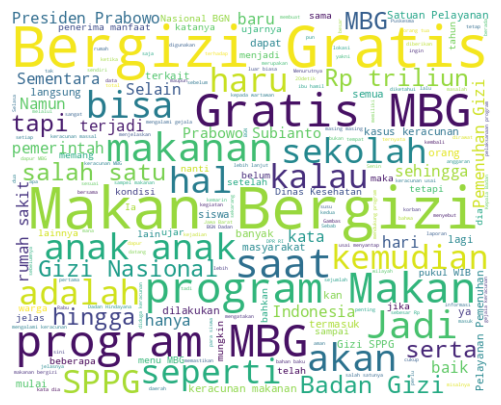

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['berita'] = df['berita'].fillna('')

text = ' '.join(df['berita'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','content','continue','scroll','co','...','amp','yang','dan','di','ke','dari','untuk','pada','dengan','sebagai','karena','oleh','dalam','itu','ini','juga','agar','atau','bagi','antara','tidak','ada','sudah','masih','saya','kami','kita','mereka','nya','aku','tersebut','https','co','id','com','detik','berita','video','foto','baca','lihat','menurut'])

WC = WordCloud(stopwords=stopwords, background_color='white', width=500, height=400)
WC.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()

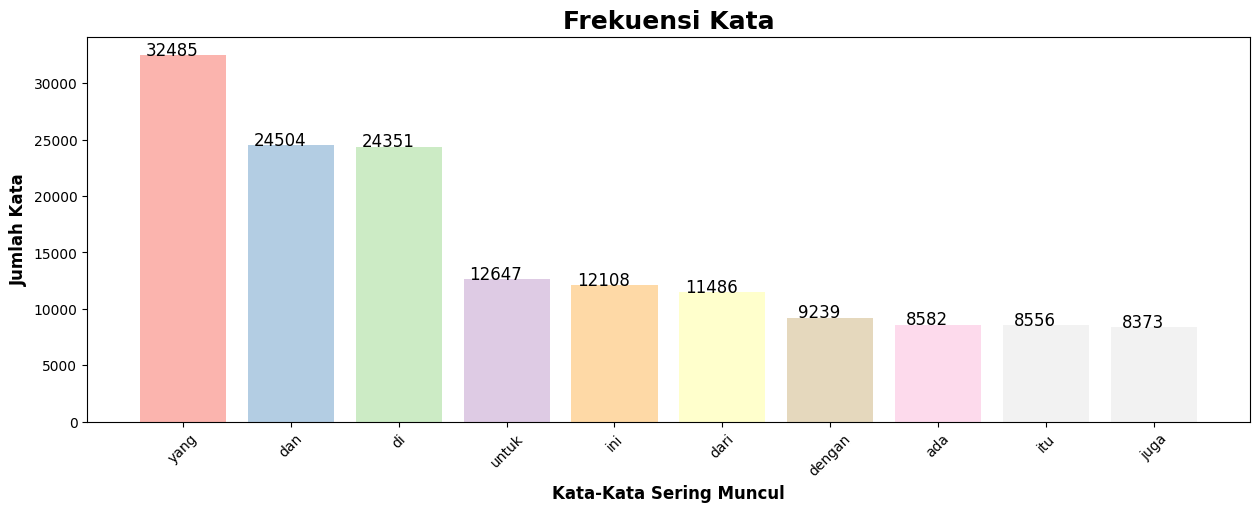

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["berita"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

#Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

#Membuat plot
plt.figure(figsize=(15, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

#Menambah angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

**CLEANING PROCESS**

In [ ]:
import re
import string
import nltk

#Fungsi untuk menghapus URL
def remove_url(text):
  if text is not None and isinstance(text, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
  else:
    return text

#Fungsi untuk menghapus HTML
def remove_html(text):
  if text is not None and isinstance(text, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)
  else:
    return text

#Fungsi untuk menghapus simbol
def remove_symbol(text):
  if text is not None and isinstance(text, str):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text

#Fungsi untuk menghapus angka
def remove_numbers(text):
  if text is not None and isinstance(text, str):
    text = re.sub(r'\d', '', text)
  return text

df['cleaning'] = df['berita'].apply(lambda x: remove_url(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbol(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,judul,waktu_terbit,link,berita,cleaning
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...
5,Puluhan Siswa SMAN 1 Luragung Diduga Keracunan...,"Jumat, 03 Okt 2025 16:10 WIB",https://www.detik.com/jateng/berita/d-8143522/...,"Puluhan siswa SMAN 1 Luragung, Kabupaten Kunin...",Puluhan siswa SMAN Luragung Kabupaten Kuninga...
6,Keracunan MBG Hari Ini Juga Terjadi di Gunungk...,"Jumat, 03 Okt 2025 15:32 WIB",https://www.detik.com/jogja/berita/d-8143427/k...,"Enam siswa di salah satu SD Negeri di Piyaman,...",Enam siswa di salah satu SD Negeri di Piyaman ...
7,Fakta-fakta Ratusan Murid di Purworejo Pusing-...,"Sabtu, 04 Okt 2025 07:03 WIB",https://www.detik.com/jateng/berita/d-8144134/...,Kasus dugaan keracunan Makan Bergizi Gratis (M...,Kasus dugaan keracunan Makan Bergizi Gratis MB...
8,Korban Keracunan MBG di Tasikmalaya Tembus 115...,"Jumat, 03 Okt 2025 13:57 WIB",https://www.detik.com/jabar/berita/d-8143212/k...,Kasus keracunan usai mengonsumsi Makan Bergizi...,Kasus keracunan usai mengonsumsi Makan Bergizi...
9,Polisi Selidiki Dugaan Keracunan Massal MBG di...,"Jumat, 03 Okt 2025 22:30 WIB",https://www.detik.com/jatim/hukum-dan-kriminal...,Polres Bojonegoro turun tangan menyelidiki pen...,Polres Bojonegoro turun tangan menyelidiki pen...


**Case Folding**

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,judul,waktu_terbit,link,berita,cleaning,case_folding
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di ...
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...,dicky mendesak agar kasus keracunan mbg ini me...
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan ...
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa m...


**Normalisasi Kata**

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fornigulo/kamus-slag
!unzip kamus-slag.zip

Dataset URL: https://www.kaggle.com/datasets/fornigulo/kamus-slag
License(s): RAIL
  0% 0.00/248k [00:00<?, ?B/s]
100% 248k/248k [00:00<00:00, 532MB/s]
Archive:  kamus-slag.zip
  inflating: kamuskatabaku.xlsx      


In [ ]:
import pandas as pd

#Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
  if isinstance(text, str):
    words = text.split()
    replaced_words = []
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

    for word in words:
      if word in kamus_tidak_baku:
        baku_word = kamus_tidak_baku[word]
        if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
          replaced_words.append(baku_word)
          kalimat_baku.append(baku_word)
          kata_diganti.append(word)
          kata_tidak_baku_hash.append(hash(word))
      else:
        replaced_words.append(word)
    replaced_text = ' '.join(replaced_words)
  else:
    replaced_text = ''
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

  return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
#Baca dataset

data = pd.DataFrame(df[['judul','waktu_terbit','link','berita','cleaning','case_folding']])

data.head(5)

,judul,waktu_terbit,link,berita,cleaning,case_folding
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di ...
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...,dicky mendesak agar kasus keracunan mbg ini me...
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan ...
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa m...


In [ ]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

kamus_data.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
#Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(data[['judul','waktu_terbit','link','berita','cleaning','case_folding','normalisasi']])

df.head(5)

,judul,waktu_terbit,link,berita,cleaning,case_folding,normalisasi
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di b...
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...,dicky mendesak agar kasus keracunan mbg ini me...,dicky mendesak agar kasus keracunan mbak ini m...
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan m...
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa me...


**Tokenization**

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,judul,waktu_terbit,link,berita,cleaning,case_folding,normalisasi,tokenize
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di b...,"[kasus, keracunan, massal, yang, menimpa, sisw..."
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,"[kepala, satuan, pelayanan, pemenuhan, gizi, s..."
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...,dicky mendesak agar kasus keracunan mbg ini me...,dicky mendesak agar kasus keracunan mbak ini m...,"[dicky, mendesak, agar, kasus, keracunan, mbak..."
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan m...,"[sebanyak, siswa, di, purworejo, diduga, kerac..."
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa me...,"[bahkan, menurut, dicky, kriteria, dipenuhi, b..."


**Stopword Removal**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x:remove_stopwords(x))

df.head(5)

,judul,waktu_terbit,link,berita,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di b...,"[kasus, keracunan, massal, yang, menimpa, sisw...","[keracunan, massal, menimpa, siswa, bandung, b..."
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,"[kepala, satuan, pelayanan, pemenuhan, gizi, s...","[kepala, satuan, pelayanan, pemenuhan, gizi, s..."
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...,dicky mendesak agar kasus keracunan mbg ini me...,dicky mendesak agar kasus keracunan mbak ini m...,"[dicky, mendesak, agar, kasus, keracunan, mbak...","[dicky, mendesak, keracunan, mbak, perhatian, ..."
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan m...,"[sebanyak, siswa, di, purworejo, diduga, kerac...","[siswa, purworejo, diduga, keracunan, makanan,..."
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa me...,"[bahkan, menurut, dicky, kriteria, dipenuhi, b...","[dicky, kriteria, dipenuhi, menekan, angka, ke..."


**Steaming data**

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['stopword removal'].apply(lambda x:' '.join(stem_text(x)))

df.head(5)

,judul,waktu_terbit,link,berita,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,"Mengenal Senyawa Nitrit, Pemicu Keracunan MBG ...",1 jam yang lalu,https://health.detik.com/diet/d-8145435/mengen...,Kasus keracunan massal yang menimpa 1.315 sisw...,Kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di ...,kasus keracunan massal yang menimpa siswa di b...,"[kasus, keracunan, massal, yang, menimpa, sisw...","[keracunan, massal, menimpa, siswa, bandung, b...",racun massal timpa siswa bandung barat bikin g...
1,"Puluhan Siswa-Guru Keracunan MBG, Kepala SPPG ...",18 menit yang lalu,https://www.detik.com/kalimantan/berita/d-8145...,Kepala Satuan Pelayanan Pemenuhan Gizi (SPPG) ...,Kepala Satuan Pelayanan Pemenuhan Gizi SPPG Mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,kepala satuan pelayanan pemenuhan gizi sppg mu...,"[kepala, satuan, pelayanan, pemenuhan, gizi, s...","[kepala, satuan, pelayanan, pemenuhan, gizi, s...",kepala satu layan penuh gizi sppg mulia kerta ...
2,Video: Keracunan MBG Layak Ditetapkan Jadi KLB,"Jumat, 03 Okt 2025 21:41 WIB",https://health.detik.com/detiktv/d-8144126/vid...,Dicky mendesak agar kasus keracunan MBG ini me...,Dicky mendesak agar kasus keracunan MBG ini me...,dicky mendesak agar kasus keracunan mbg ini me...,dicky mendesak agar kasus keracunan mbak ini m...,"[dicky, mendesak, agar, kasus, keracunan, mbak...","[dicky, mendesak, keracunan, mbak, perhatian, ...",dicky desak racun mbak perhati perintah klb wi...
3,Ratusan Siswa di Purworejo Diduga Keracunan MBG,"Jumat, 03 Okt 2025 15:13 WIB",https://www.detik.com/jateng/berita/d-8143374/...,Sebanyak 127 siswa di Purworejo diduga keracun...,Sebanyak siswa di Purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan ...,sebanyak siswa di purworejo diduga keracunan m...,"[sebanyak, siswa, di, purworejo, diduga, kerac...","[siswa, purworejo, diduga, keracunan, makanan,...",siswa purworejo duga racun makan program makan...
4,Video: Epidemiolog Sebut Data Keracunan MBG un...,"Jumat, 03 Okt 2025 20:55 WIB",https://health.detik.com/detiktv/d-8144079/vid...,"Bahkan menurut Dicky, 3 kriteria dipenuhi bisa...",Bahkan menurut Dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa m...,bahkan menurut dicky kriteria dipenuhi bisa me...,"[bahkan, menurut, dicky, kriteria, dipenuhi, b...","[dicky, kriteria, dipenuhi, menekan, angka, ke...",dicky kriteria penuh tekan angka racun mbgklik...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   judul             3735 non-null   object
 1   waktu_terbit      3735 non-null   object
 2   link              3735 non-null   object
 3   berita            3735 non-null   object
 4   cleaning          3735 non-null   object
 5   case_folding      3735 non-null   object
 6   normalisasi       3735 non-null   object
 7   tokenize          3735 non-null   object
 8   stopword removal  3735 non-null   object
 9   stemming_data     3735 non-null   object
dtypes: object(10)
memory usage: 291.9+ KB


**Wordcloud setelah Preprocessing**

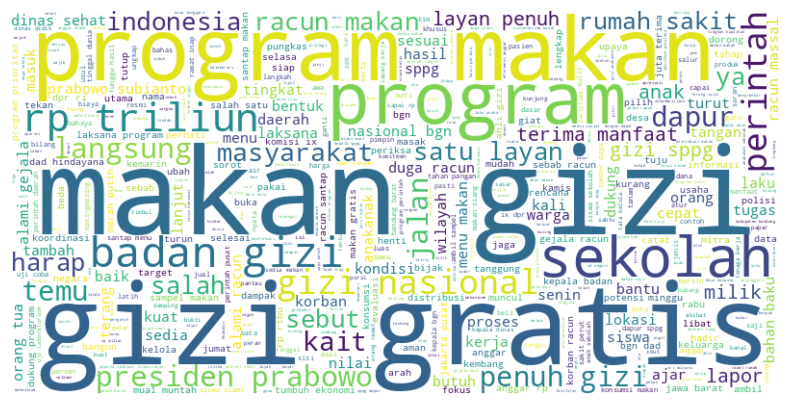

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['stemming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','mbak','jadi','content','continue','scroll','co','...','amp','yang','dan','di','ke','dari','untuk','pada','dengan','sebagai','karena','oleh','dalam','itu','ini','juga','agar','atau','bagi','antara','tidak','ada','sudah','masih','saya','kami','kita','mereka','nya','aku','tersebut','https','co','id','com','detik','berita','video','foto','baca','lihat','menurut'])

wc = WordCloud(stopwords=stopwords, background_color='white', max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

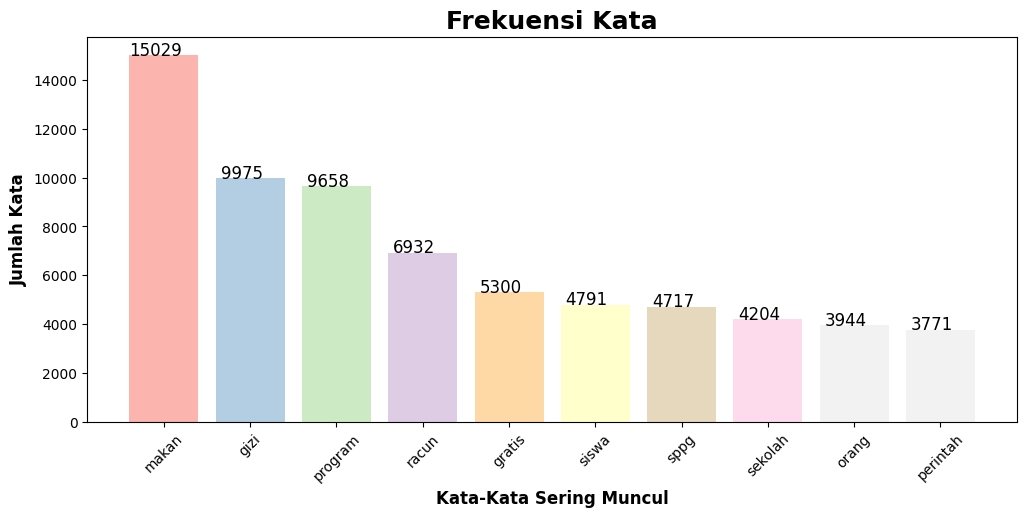

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df["stemming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https','mbak','jadi','content','continue','scroll','co','...','amp','yang','dan','di','ke','dari','untuk','pada','dengan','sebagai','karena','oleh','dalam','itu','ini','juga','agar','atau','bagi','antara','tidak','ada','sudah','masih','saya','kami','kita','mereka','nya','aku','tersebut','https','co','id','com','detik','berita','video','foto','baca','lihat','menurut'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

#Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

#Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

#Menambah angka rata tengah diatas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);